In [29]:
# multiple_linear_regression.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("C:\\Users\\17783\\Downloads\\18 .EDUCATIONAL WIN\\18. COMPUTER SCIENCEE\\EXCELR DA DS AI\\9. DS & ML  & AI   PYTHON SQL\\9. DAILY CLASSES & ASSIGNMENTS PYTHON  DS ML AI\\09. DAILY CLASSES & ASSIGNMENTS\\Assignments\\6.MLR\\ToyotaCorolla - MLR.csv")

# Display basic info and check for nulls
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   CC         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

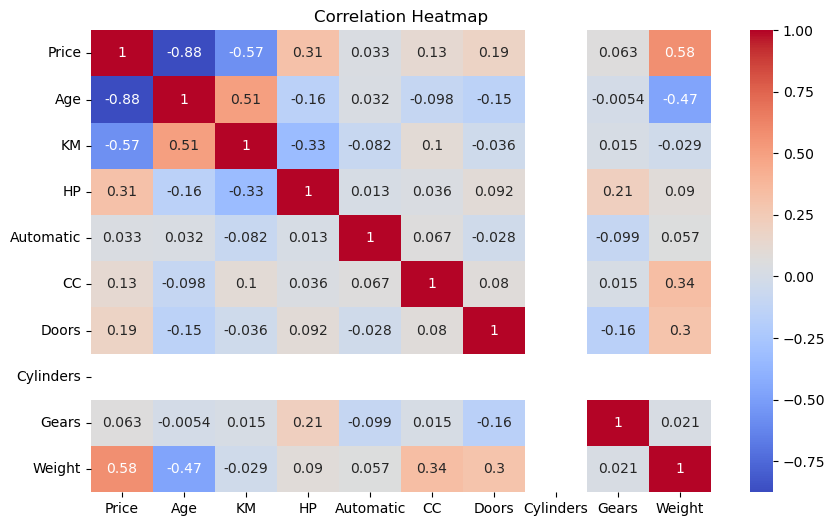

In [31]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



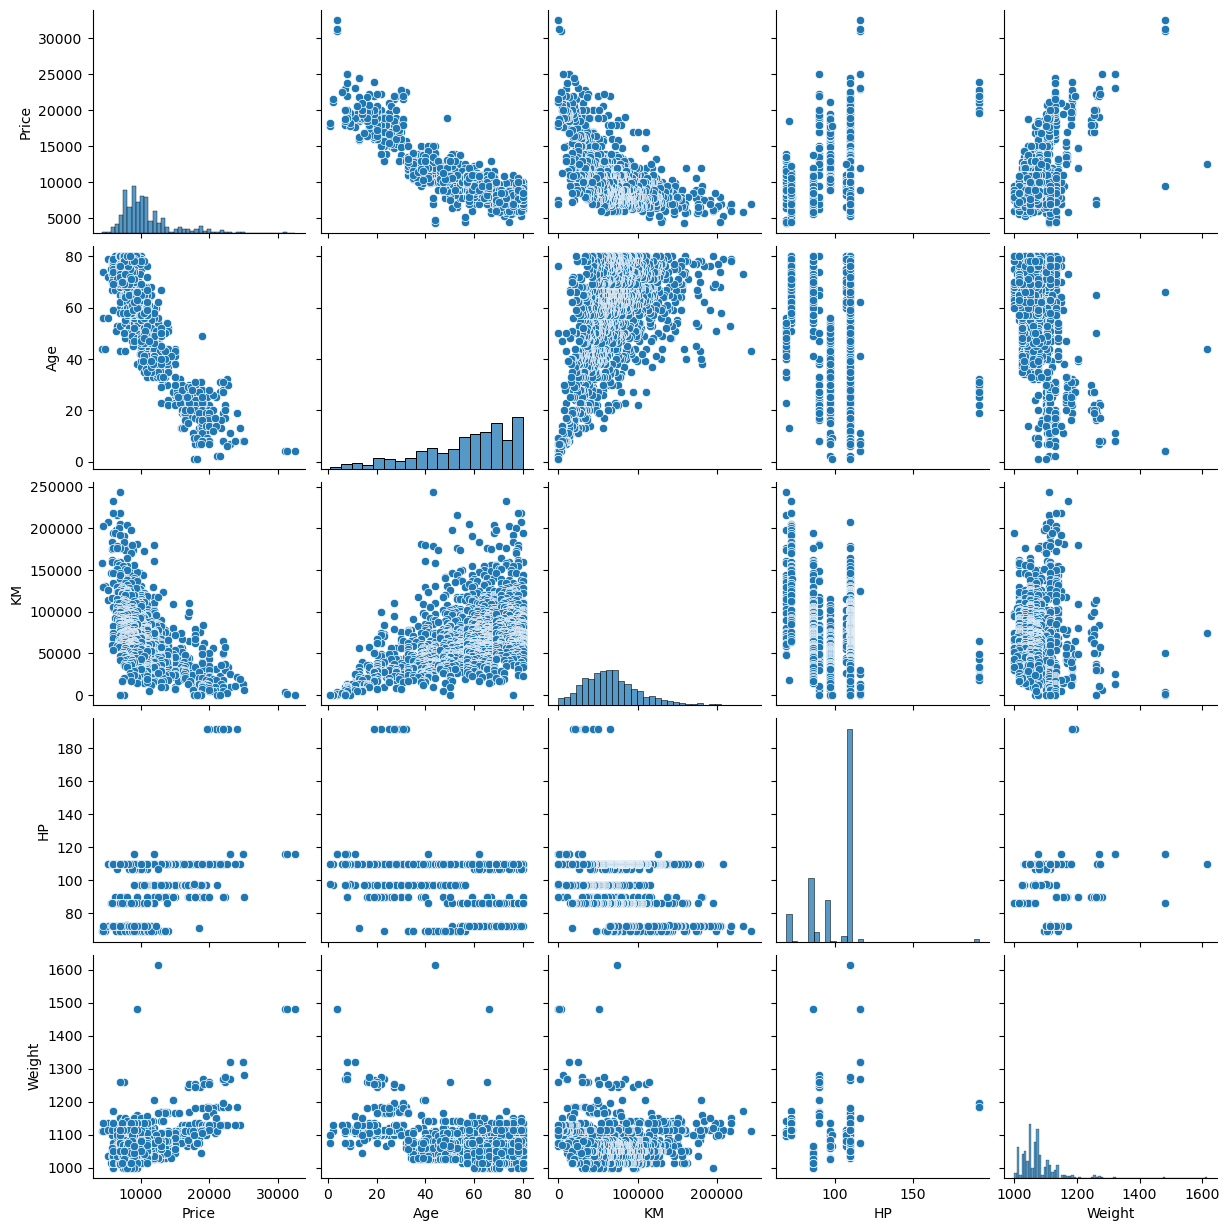

(      Age     KM FuelType   HP  Automatic    CC  Doors  Weight
 0      23  46986   Diesel   90          0  2000      3    1165
 1      23  72937   Diesel   90          0  2000      3    1165
 2      24  41711   Diesel   90          0  2000      3    1165
 3      26  48000   Diesel   90          0  2000      3    1165
 4      30  38500   Diesel   90          0  2000      3    1170
 ...   ...    ...      ...  ...        ...   ...    ...     ...
 1431   69  20544   Petrol   86          0  1300      3    1025
 1432   72  19000   Petrol   86          0  1300      3    1015
 1433   71  17016   Petrol   86          0  1300      3    1015
 1434   70  16916   Petrol   86          0  1300      3    1015
 1435   76      1   Petrol  110          0  1600      5    1114
 
 [1436 rows x 8 columns],
 0       13500
 1       13750
 2       13950
 3       14950
 4       13750
         ...  
 1431     7500
 1432    10845
 1433     8500
 1434     7250
 1435     6950
 Name: Price, Length: 1436, dtype: int6

In [35]:
sns.pairplot(df[['Price', 'Age', 'KM', 'HP', 'Weight']])
plt.show()

# Features and target
X = df[['Age', 'KM', 'FuelType', 'HP', 'Automatic', 'CC', 'Doors', 'Weight']]
y = df['Price']
X,y

In [41]:
# Preprocessing: OneHotEncoding for FuelType, Standardization for numerical values
categorical_features = ['FuelType']
numeric_features = ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors',
                                  'Weight']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['FuelType'])])

In [43]:

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(      Age      KM FuelType   HP  Automatic    CC  Doors  Weight
 899    62   59295   Petrol   86          0  1300      5    1035
 881    68   61568   Petrol  110          0  1600      4    1035
 310    40   38653   Petrol  110          0  1600      5    1080
 1145   75  101855   Petrol  110          0  1600      5    1070
 31     22   35199   Petrol   97          0  1400      3    1100
 ...   ...     ...      ...  ...        ...   ...    ...     ...
 1095   76  125778   Petrol  110          0  1600      3    1050
 1130   73  107108   Petrol  110          0  1600      3    1050
 1294   80   71740   Petrol  110          0  1600      5    1070
 860    63   64690   Petrol   86          0  1300      3    1020
 1126   80  110000   Petrol  110          0  1600      4    1035
 
 [1148 rows x 8 columns],
       Age      KM FuelType   HP  Automatic    CC  Doors  Weight
 594    50   22500   Petrol   97          0  1400      3    1025
 754    68   80426   Petrol  110          0  1600      3    10

In [ ]:
# Model 1: Basic Linear Regression
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])
pipeline_lr.fit(X_train, y_train)

y_pred_lr = pipeline_lr.predict(X_test)
print("\nModel 1 - Linear Regression")
print("R^2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Model 2: Ridge Regression
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(alpha=1.0))])
pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_test)

print("\nModel 2 - Ridge Regression")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# Model 3: Lasso Regression
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso(alpha=0.1))])
pipeline_lasso.fit(X_train, y_train)
y_pred_lasso = pipeline_lasso.predict(X_test)

print("\nModel 3 - Lasso Regression")
print("R^2 Score:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Optional: Coefficient interpretation (for Linear Regression)
model = pipeline_lr.named_steps['regressor']
features_after_encoding = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()
coefficients = pd.Series(model.coef_, index=features_after_encoding)
print("\nModel Coefficients:")
print(coefficients.sort_values(ascending=False))

# Interview Question Answers
print("\nInterview Q1: Normalization vs Standardization")
print("Normalization scales data between 0 and 1. Standardization transforms it to have mean 0 and std 1. Helpful in regression to ensure features are comparable in scale.")

print("\nInterview Q2: Addressing Multicollinearity")
print("Techniques: Remove correlated variables, apply PCA, use regularization (Ridge/Lasso). Ridge is especially helpful for handling multicollinearity.")

